In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# --- Load Combined Datasets (YouTube + Reddit) ---
df_airpods_yt = pd.read_csv('/content/drive/MyDrive/Colab/DAI_AID/extracted_data/cleaned_data/airpodsmax_youtube_cleaned.csv')
df_senn_yt = pd.read_csv('/content/drive/MyDrive/Colab/DAI_AID/extracted_data/cleaned_data/sennheiser_momentum4_youtube_cleaned.csv')
df_sony_yt = pd.read_csv('/content/drive/MyDrive/Colab/DAI_AID/extracted_data/cleaned_data/sony_xm5_youtube_cleaned.csv')

df_airpods_reddit = pd.read_csv('/content/drive/MyDrive/Colab/DAI_AID/extracted_data/cleaned_data/airpodsmax_reddit_cleaned.csv')
df_senn_reddit = pd.read_csv('/content/drive/MyDrive/Colab/DAI_AID/extracted_data/cleaned_data/sennheiser_momentum4_reddit_cleaned.csv')
df_sony_reddit = pd.read_csv('/content/drive/MyDrive/Colab/DAI_AID/extracted_data/cleaned_data/sony_xm5_reddit_cleaned.csv')

# --- Merge datasets ---
def merge_comments(df1, df2):
    return pd.concat([
        df1[df1['cleaned_comment'].notnull()][['cleaned_comment']],
        df2[df2['cleaned_comment'].notnull()][['cleaned_comment']]
    ], ignore_index=True)

df_airpods = merge_comments(df_airpods_yt, df_airpods_reddit)
df_senn = merge_comments(df_senn_yt, df_senn_reddit)
df_sony = merge_comments(df_sony_yt, df_sony_reddit)

# --- Narrowed feature keywords ---
feature_keywords = {
    "microphone", "fit", "build", "latency", "comfort"
}


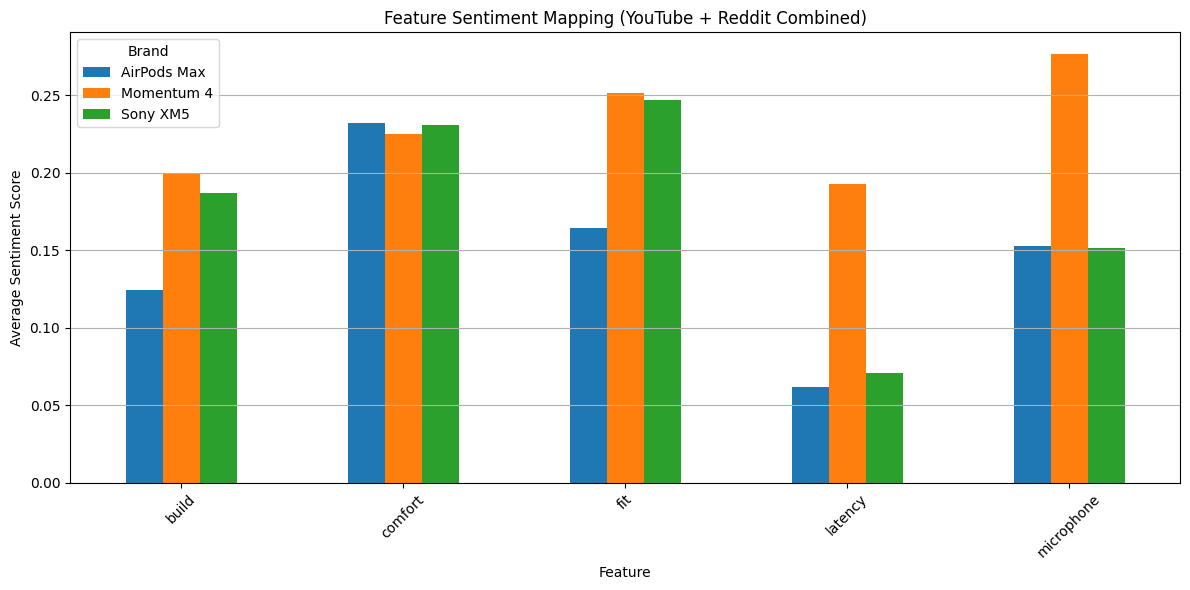

In [ ]:
def compute_feature_sentiment(df, name):
    df = df.copy()
    df['sentiment'] = df['cleaned_comment'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

    result = {}
    for feature in feature_keywords:
        # Match the feature as a whole word (escaped for safety)
        df[feature] = df['cleaned_comment'].apply(
            lambda text: bool(re.search(rf"\b{re.escape(feature)}\b", str(text).lower()))
        )
        result[feature] = df[df[feature]]['sentiment'].mean()

    return pd.DataFrame.from_dict(result, orient='index', columns=[name])


# Compute sentiment scores
sent_airpods = compute_feature_sentiment(df_airpods, "AirPods Max")
sent_senn = compute_feature_sentiment(df_senn, "Momentum 4")
sent_sony = compute_feature_sentiment(df_sony, "Sony XM5")

# Combine and plot
sentiment_combined = pd.concat([sent_airpods, sent_senn, sent_sony], axis=1).sort_index()

# Plot
sentiment_combined.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Sentiment Mapping (YouTube + Reddit Combined)")
plt.xlabel("Feature")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Brand")
plt.tight_layout()
plt.show()
